# SIMULAZIONE: metodi Monte Carlo
In questo colab si utilizzano tecniche Monte Carlo, in particolare il metodo del rigetto e metodo di ricerca linare (numerico), per poi stimare (in un altro colab) la dose che prenderebbe un'astronauta per un viaggio di 700 giorni nel sistema solare.

Rispetto ai dati sperimentali a disposizioni (limitati) si aumenta il dominio dell'enerfia fino a 500GeV per ricreare una situazione più realistica.

In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from timeit import default_timer as timer

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/Problem_solving

Mounted at /content/drive
/content/drive/MyDrive/Problem_solving


In [3]:
#funzione di fit 

def model1(x, gamma, b, a, A, PHI, Er):
  p=A*(x+a*np.exp(-b*x)+PHI)**(-gamma)*x*(x+2*Er)/((x+PHI)*(x+2*Er+PHI))
  return p


# Metodo del rigetto ottimizzato
Utilizzo una funzione che sovrastima la distribuzione cercata.


# Protoni

In [4]:
#Monte Carlo con metodo rigetto
#Distribuzione da cui voglio esrarre, i parametri variano in base al tipo di ione
#Definsco la funzione che sovrastima la distribuzione dei raggi cosmici, la cumulativa e l'inversa della cumulativa per i protoni


def f1(x):  
  if x>=0 and x<=2:
    f1 = 1800
  else:
    f1=1800/(x-1)
  return f1  

def cumulativa(x):
  if x>0 and x<=2:
    F=1800*x
  else:
    F=1800*(2+np.log(x-1))  
  return F   

def inversa(y):
  if y>0 and y<=3600:
    Inv=y/1800
  else:
    Inv=np.exp(y/1800-2)+1
  return Inv 

In [5]:
#protoni, i valori di energia vanno da 0 a 50

energia=[]
F_50=cumulativa(500)
random.seed(5)
count=0
N=1000000
it=timer()

for n in range(N):
 psi1=random.random()
 psi2=psi1*F_50
 
 x1=inversa(psi2)

 p=model1(x1,2.6680, 0.0001, 0.2531, 13578.0045, 0.7, 0.938)

 psi3=random.random()
 y=psi3*f1(x1)

 if y<=p:
   count=count+1
   E=x1
   energia.append(E)
    
et=timer()
time=et-it
print('Tempo in secondi =',time)
print('Punti accettati =',count)
rapporto_in_out=count/N
print('Punti accettati su punti totali =',rapporto_in_out)

Tempo in secondi = 5.228353549000005
Punti accettati = 210080
Punti accettati su punti totali = 0.21008


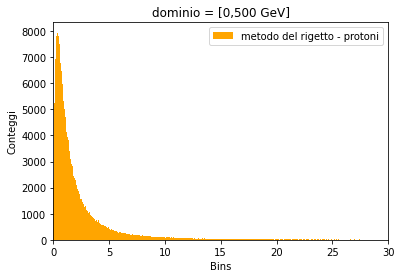

In [6]:
#istogramma dei valori
energia=np.array(energia)

_ = plt.hist(energia, bins='auto', label='metodo del rigetto - protoni', color='orange')
plt.legend()
plt.xlabel('Bins')
plt.ylabel('Conteggi')
plt.xlim([0,30])
plt.title('dominio = [0,500 GeV]')
plt.savefig('protoni.pdf')

plt.show()

# Elio

In [7]:
def f_He(x):  
  if x>0 and x<=0.3:
    f1 = 250
  else:
    f1 = 250*np.exp(0.3)*np.exp(-x)
  return f1  

def cumulativa_He(x):
  if x>0 and x<0.3:
    F=250*x
  else:
    F = 250*(-np.exp(0.3-x)+1.3)
  return F 

def inversa_He(y):
  if y>0 and y<=75:
    Inv=y/250
  else:
    Inv = -np.log(np.exp(-0.3)*(-y/250+1.3))
  return Inv 

In [8]:
energia_He=[]
Er_elio=0.938*4       #energia a riposo elio in GeV
F_1=cumulativa_He(500)  #cumulativa nell'estremo superiore del suo dominio (0,500)
random.seed(5)
count=0
N=1000000


for n in range(N):
 psi1=random.random()
 psi2=psi1*F_1

 x2=inversa_He(psi2)

 p_He = model1(x2, 2.8813, 1.6268, 1.76533*10**(-13), 849.3254, 0.7, Er_elio)

 psi3=random.random()
 y=psi3*f_He(x2)

 if y<=p_He:
   count=count+1
   E=x2
   energia_He.append(E)
    

print('Punti accettati =',count)
rapporto_in_out=count/N
print('Accettati su totali =', rapporto_in_out)

Punti accettati = 825181
Accettati su totali = 0.825181


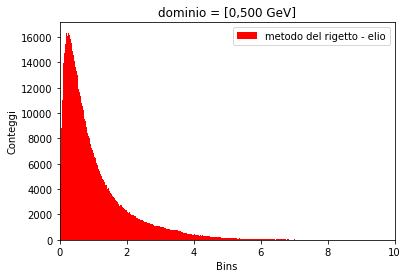

In [9]:
energia_He=np.array(energia_He)

_ = plt.hist(energia_He, bins='auto', label='metodo del rigetto - elio', color='red')
plt.legend()
plt.xlabel('Bins')
plt.ylabel('Conteggi')
plt.xlim([0,10])
plt.title('dominio = [0,500 GeV]')
plt.savefig('elio.pdf')
plt.show()

# Boro

In [10]:
#Boro

def f_b(x):  
  if x>0.4 and x<=2:
    f1 = 2
  elif x>2:
    f1 = 2**4*x**{-3}
  else:
    return 0
  return f1  

def cumulativa_B(x):
  if x>0.4 and x<=2:
    F=2*x
  elif x>2:
    F=4*(3-2/x**2)
  else:
    return 0
  return F 

def inversa_B(y):
  if y>0.8 and y<=4:
    Inv=y/2
  elif y>4:
    Inv=np.sqrt(8/(12-y))
  else:
    return 0
  return Inv 

Punti accettati = 966508
Accettati su totali = 0.966508


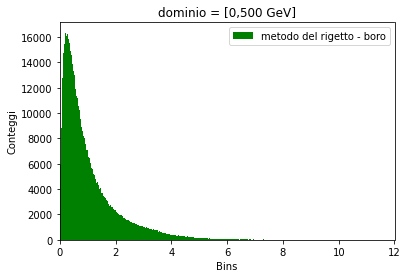

In [11]:
energia_B=[]
Er_boro=0.938*10       #energia a riposo boro in GeV
F_B=cumulativa_B(500)  #cumulativa nell'estremo superiore del suo dominio (0,100)
random.seed(20)
count=0
N=1000000


for n in range(N):
 psi1=random.random()
 psi2=psi1*F_B
 if psi2 > 0.4:
   x2=inversa_He(psi2)

   p_B = model1(x2, 2.9306, 0.2687, 0.5909, 6.1646, 0.3, Er_boro)

   psi3=random.random()
   y=psi3*f_b(x2)

   if y<=p_B:
     count=count+1
     E_B=x2
     energia_B.append(E_B)
 else:
    pass  

print('Punti accettati =',count)
rapporto_in_out=count/N
print('Accettati su totali =', rapporto_in_out)

energia_B=np.array(energia_B)

_ = plt.hist(energia_He, bins='auto', label='metodo del rigetto - boro', color='green')
plt.legend()
plt.xlabel('Bins')
plt.ylabel('Conteggi')
plt.xlim([0,12])
plt.title('dominio = [0,500 GeV]')
plt.savefig('boro.pdf')

plt.show()

# Metodi numerici: ricerca lineare (protoni)

Altra tecnica Monte Carlo, che non richiede la forma analitica della cumulativa, ma si trova con metodi numerici

In [12]:
#Metodo del trapezio per risolvere numericamente l'integrale, come output mi costruisco un dataframe con il valore dell'integrale e la x corrispondente
#errore come N**(-3)

def trapezio(func,a,b,n):
  x_array=[]
  integral_array=[]

  integral=0.0
  n=int(n)
  N=2**n
  dx=(b-a)/N
  N=int(N)
  x=a
  if(N>1e9):
    return
  for i in range(N):
    x=a+i*dx
    x_array.append(x)
    sumf=func(x)+func(x+dx)
    integral=sumf*dx/2+integral
    integral_array.append(integral)
    x_array1=np.array(x_array)
    integral_array1=np.array(integral_array)
  df=pd.DataFrame({'x':x_array1, 'integral':integral_array1})
    
  return df

In [13]:
#valori per i protoni

gamma=2.6680
b=0.0001
a=0.2531
A=13578.0045
PHI=0.7
Er=0.938

def f_protoni(x):
  return A*(x+a*np.exp(-b*x)+PHI)**(-gamma)*x*(x+2*Er)/((x+PHI)*(x+2*Er+PHI))

df = trapezio(f_protoni,0,50,15)

In [14]:
#estraggo un valore dell'integrale e trovo il corrispettivo valore di x, in questo modo ho l'inversa della cumulativa

max_int=df.iloc[-1,1]

N_run=291619
E_estratte=[]
random.seed(10)


start=timer()

for n in range(N_run):
  xi=random.random()*max_int
  x=np.searchsorted(df.integral, xi)
  E=df.iloc[x,0]
  E_estratte.append(E)
  

end=timer()
tot_time=end-start
print('Tempo per comletare il processo in secondi =', tot_time)

Tempo per comletare il processo in secondi = 18.175774644


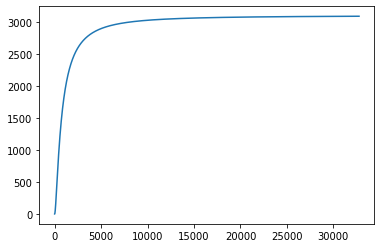

In [15]:
#df.integral.plot() #cumulativa della funzione per verificare sia crescente

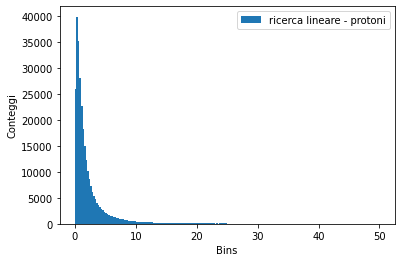

In [ ]:
#istogramma dei valori

E_estratte=np.array(E_estratte)

_ = plt.hist(E_estratte, bins=200, label='ricerca lineare - protoni')
plt.xlabel('Bins')
plt.ylabel('Conteggi')
plt.legend()
plt.savefig('numerico_p.pdf')
plt.show()

Osservo che il metodo più veloce è quello del rigetto ottimizzato: lo scelgo per la mia simulazione